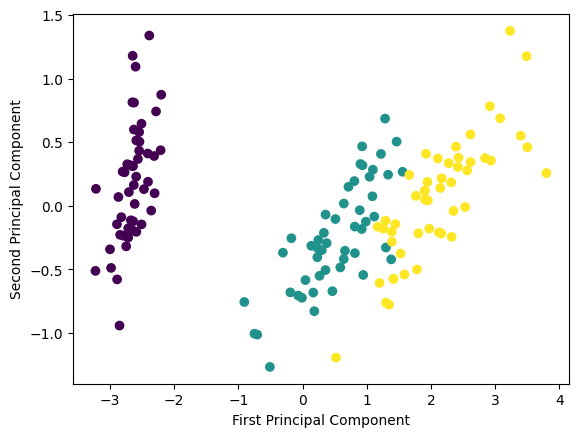

In [1]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# Load iris dataset
iris = load_iris()

# Let's say we want to reduce the data to two dimensions
pca=PCA(n_components=2)

# Fit and transform the data 
iris_pca=pca.fit_transform(iris.data)

# Now we can plot the first two principal components 
plt.scatter(iris_pca[:,0],iris_pca[:,1],c=iris.target) 
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()


In [2]:
iris_pca.mean(axis=0)

array([-3.03164901e-15, -9.00020799e-16])

 **Do PCA on Tips Dataset**

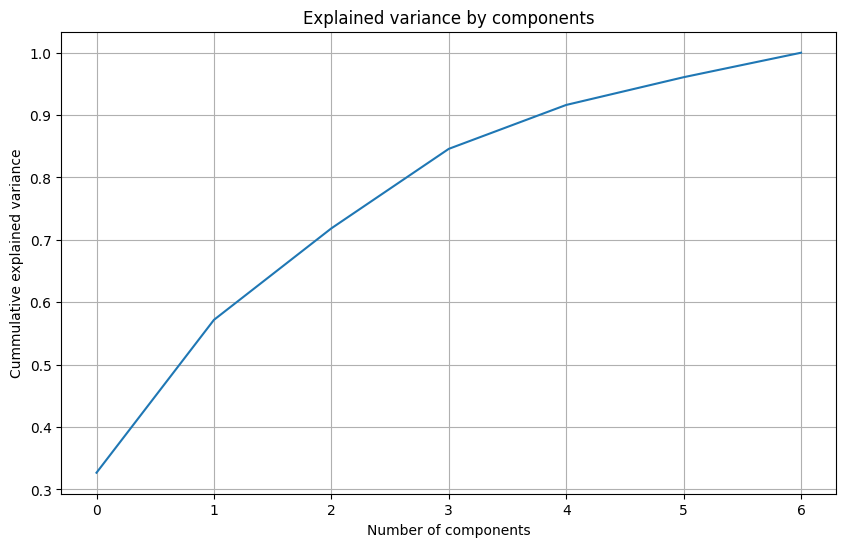

                PC1)      PC2)      PC3)      PC4)      PC5)      PC6)  \
total_bill  0.577289  0.133642  0.164816  0.061756  0.058183 -0.378659   
tip         0.531650  0.178333  0.159316 -0.010375  0.637807  0.274214   
sex         0.189111 -0.152571 -0.588523  0.762364 -0.000506  0.115541   
smoker      0.036649 -0.335732  0.724260  0.501763 -0.212334 -0.111732   
day        -0.156579  0.660434 -0.047053  0.229846 -0.003218 -0.606759   
time       -0.281249  0.556479  0.266919  0.297170  0.004329  0.572115   
size        0.493317  0.261729 -0.055523 -0.148236 -0.738039  0.245190   

                PC7)  
total_bill -0.686390  
tip         0.421978  
sex        -0.007162  
smoker      0.228151  
day         0.340735  
time       -0.352618  
size        0.241370  


In [12]:
# import libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

# load the tips data
tips = sns.load_dataset('tips')
# preprocessing 
# encode categorical data 

le = LabelEncoder()
cat_features=tips.select_dtypes(include='category').columns

for features in cat_features:
    tips[features]=le.fit_transform(tips[features])

# standardize the data 

scaler=StandardScaler()
tips_scaled=scaler.fit_transform(tips)

# apply PCA

pca=PCA()
X_pca=pca.fit_transform(tips_scaled)

# plot the explained variance ratio  
plt.figure(figsize=(10,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cummulative explained variance')
plt.title('Explained variance by components')
plt.grid(True)
plt.show()

# create database to show the loadings
loadings=pd.DataFrame(pca.components_.T, columns=[f'PC{i+1})' for i in range (pca.n_components_)], index=tips.columns)
print(loadings)

In [6]:
cat_features

Index(['sex', 'smoker', 'day', 'time'], dtype='object')

**PCA on diamonds dataset**

In [5]:
# import libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

# load the diamonds data
diamonds = sns.load_dataset('diamonds')

# prepare data for PCA
X=diamonds[['carat', 'depth', 'table', 'x', 'y', 'z']]

# standardize the data
X=(X-X.mean())/X.std()

# prtform PCA with two components 
pca=PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

In [ ]:
# Add arrows indicating the directionn and strength of each original feature in the principal component space 
features=pca.components_.T
for i, feature in enumerate(features):
    x,y=feature
    color='red' if x>0 and y>0 else 'green' if x<0 and y<0 else 'blue' if x<0 and y>0 else 'purple'
    plt.arrow(0,0,x,y,color=color,alpha=0.5, width=0.1,
             head_width=0.3, head_length=0.3,length_includes_head=True)
    plt.text(x*1.2, y*1.2, x.columns[i], color=color, ha='center', va='center', fontsize=12)

# set the axis limits 
plt.xlim(-1, 1)
plt.ylim(-1, 1)

# set the axis labels 
plt.xlim('PC1')
plt.ylim('PC2')
plt.show()